# Proyecto 1: Clasificación de "fake news" con modelos de machine learning



**Etapa 1**

* Objetivos
  * --

* Entendimiento de los datos
  * --

* Preparación y preprocesamiento de los datos
  * --

* Modelamiento
  * --



**Grupo:** E1- 26

# 1. Objetivos

# 2. Entendimiento de los datos

## 2.1 Descripción de los datos

## 2.2 Carga y manipulación basica

### 2.2.1 Importacion y carga de datos:

In [ ]:
# Uninstall numba, pandas_profiling and visions to clear any existing installation
!pip uninstall numba -y
!pip uninstall pandas_profiling -y
!pip uninstall visions -y

# Install the necessary modules
!pip install numba==0.58.1
!pip install ydata-profiling
# Librerias generales
# Pandas
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Número máximo de filas a mostar
# Ranom seed
import numpy as np
np.random.seed(3301)

# Seaborn
import seaborn as sns

# Matplolib
%matplotlib inline
import matplotlib.pyplot as plt

# Plotly
!pip install plotly
import plotly.express as px

#Limpieza de datos

!pip install spacy
!python -m spacy download es_core_news_sm
%pip install nbformat

!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
import re
import unicodedata

# Descargar e inicializar spaCy en español
import os
if not os.path.exists(spacy.util.get_package_path("es_core_news_sm")):
    spacy.cli.download("es_core_news_sm")

nlp = spacy.load("es_core_news_sm", disable=["ner", "textcat"])

Found existing installation: numba 0.58.1
Uninstalling numba-0.58.1:
  Successfully uninstalled numba-0.58.1
Found existing installation: visions 0.7.6
Uninstalling visions-0.7.6:
  Successfully uninstalled visions-0.7.6
  Using cached numba-0.58.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.7 kB)
Using cached numba-0.58.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba-cuda 0.0.17.1 requires numba>=0.59.1, but you have numba 0.58.1 which is incompatible.
  Using cached visions-0.7.6-py3-none-any.whl.metadata (11 kB)
Using cached visions-0.7.6-py3-none-any.whl (104 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 42.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Ubicación de la base de datos
db_location = '/content/fake_news_spanish.csv'

In [ ]:
# Cargar los datos
df = pd.read_csv(db_location, sep=';', encoding = "utf-8")

### 2.2.2 Limpieza

In [ ]:
# Dimensiones de los datos y vizualización de los datos
display(df.sample(5))
display(df.head(5))
display(df.tail(5))

,ID,Label,Titulo,Descripcion,Fecha
40153,ID,0,Torra se querella contra Martina Velarde por a...,Torra y compañía dicen que tenemos un gen meno...,04/12/2018
38869,ID,1,Esperanza Aguirre niega que ordenara espiar a ...,La Audiencia Provincial de Madrid ha reanudado...,11/02/2019
52222,ID,0,Tres mujeres dan la sorpresa en la jornada ele...,"Cuca Gamarra (UPN), Maddalen Iriarte (Izquierd...",13/07/2020
8542,ID,1,"ERC, molesto con el PSOE por dar por hecho ya ...",Sánchez aseguró que el pacto va a estar siempr...,05/12/2019
9977,ID,1,"Del 'Pablo, tenemos 12 días para ganar' de Gab...",Repasamos algunos de los momentos más sonados ...,22/04/2021


,ID,Label,Titulo,Descripcion,Fecha
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,01/10/2023
2,ID,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,25/04/2022
3,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",03/01/2022
4,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",09/03/2018


,ID,Label,Titulo,Descripcion,Fecha
57058,ID,1,El Defensor del Pueblo reclama a la Comunidad ...,El gobierno regional han indicado que la atenc...,08/06/2021
57059,ID,0,El EQUO plantea ceder la presidencia de la Com...,Si la higiene democrática nos lleva a esa exig...,08/09/2020
57060,ID,1,Alberto Garzón: 'Que los Borbones son unos lad...,El coordinador federal de IU asegura que la mo...,12/07/2018
57061,ID,1,Vox exige entrar en el Gobierno de Castilla y ...,Santiago Abascal: Vox tiene el derecho y el de...,13/02/2022
57062,ID,1,Unas 300 personas protestan contra la visita d...,Los Mossos dEsquadra han blindado los alrededo...,09/10/2020


In [ ]:
df.shape

(57063, 5)

- Como podemos ver en el df de los datos, la colmuna ID no aporta ningún valor, entonces decidimos eliminarla,

In [ ]:
df1 = df.drop("ID", axis = 1)

- Ahora vamos a revisamos cuantos valores nulos hay por columna

In [ ]:
valores_nulos = df1.isnull().sum()
print(valores_nulos)

Label           0
Titulo         16
Descripcion     0
Fecha           0
dtype: int64


Como podemos observar, en la columna 'Título' hay 16 filas con valores nulos. Esto es mínimo en comparación con la cantidad total de filas en el dataset, por lo que decidimos eliminarlos.

In [ ]:
df2 = df1.dropna()

- Revisemos ahora si existen elementos duplicados en la columna 'Título'.

In [ ]:
duplicados_titulo = df2['Titulo'].duplicated().sum()
print(f"Duplicados según titulo: {duplicados_titulo}")

Duplicados según titulo: 5443


In [ ]:
valores_duplicados = df2[df2.duplicated(keep=False)]
valores_duplicados_ordenados = valores_duplicados.sort_values(by=df2.columns.tolist())
print(valores_duplicados_ordenados)

       Label                                             Titulo  \
24343      0  El Nueva Canarias cierra filas con Rita Maestr...   
29842      0  El Nueva Canarias cierra filas con Rita Maestr...   
1743       0  Escándalo de corrupción salpica a líderes sind...   
2981       0  Escándalo de corrupción salpica a líderes sind...   
18253      0  Escándalo de corrupción salpica a líderes sind...   
...      ...                                                ...   
9206       1  ¿Por qué las energías verdes están causando un...   
28272      1  ¿Qué son las políticas activas de empleo y por...   
37769      1  ¿Qué son las políticas activas de empleo y por...   
29781      1  Àngels Barceló: 'Los demócratas somos muchos más'   
35301      1  Àngels Barceló: 'Los demócratas somos muchos más'   

                                             Descripcion       Fecha  
24343  El Comité Federal termina con una votación uná...  10/06/2023  
29842  El Comité Federal termina con una votación uná

Después de analizar las filas repetidas y corroborar que la columna 'Label' es la mismo, y que no se trata de la misma noticia con una descripción diferente u otro diferenciador, procedemos a eliminarlas.

In [ ]:
df3 = df2.drop_duplicates(subset = ['Titulo'])

In [ ]:
# Verificamos que haya sido exitoso
print(f"Duplicados según titulo: {df3['Titulo'].duplicated().sum()}")

Duplicados según titulo: 0


### 2.2.3 Transformaciones


- Para poder manipular los datos debemos asegurarnos de que tengan el tipo correcto

In [ ]:
df3.dtypes

,0
Label,int64
Titulo,object
Descripcion,object
Fecha,object


- Al observar los resultados, encontramos que la columna 'Fecha' debería ser de tipo datetime, pero actualmente es de tipo object. Por ello, realizamos el respectivo casting.

In [ ]:
df3.Fecha.tail(10)

,Fecha
57050,17/01/2020
57051,19/01/2019
57053,07/05/2018
57055,12/03/2023
57056,21/10/2018
57057,23/12/2021
57058,08/06/2021
57059,08/09/2020
57060,12/07/2018
57061,13/02/2022


In [ ]:
df4 = df3.copy()

df4['Fecha'] = pd.to_datetime(df4.Fecha, dayfirst= True, errors = 'coerce')
df4['Fecha'].tail(10)

,Fecha
57050,2020-01-17
57051,2019-01-19
57053,2018-05-07
57055,2023-03-12
57056,2018-10-21
57057,2021-12-23
57058,2021-06-08
57059,2020-09-08
57060,2018-07-12
57061,2022-02-13


- Verificamos que la conversión de tipo se haya realizado con éxito.

In [ ]:
print(df4["Fecha"].isna().sum())

0


- Con esta transformación, podemos analizar e identificar si la fecha está directamente relacionada con la veracidad de una noticia.

Primero revisemos el rango de fechas:

In [ ]:
print("Rango de fechas:", df4["Fecha"].min(), "a", df4["Fecha"].max())

Rango de fechas: 2016-01-02 00:00:00 a 2024-12-28 00:00:00


Ahora si verifiquemos la correlación

In [ ]:
correlacion = df4["Fecha"].dt.year.corr(df["Label"])
print("Correlación entre año y etiqueta de noticia:", correlacion)

Correlación entre año y etiqueta de noticia: -0.02301578235915149


Para visualizarlo y entenderlo mejor, graficamos la distribución.

<Figure size 1000x500 with 0 Axes>

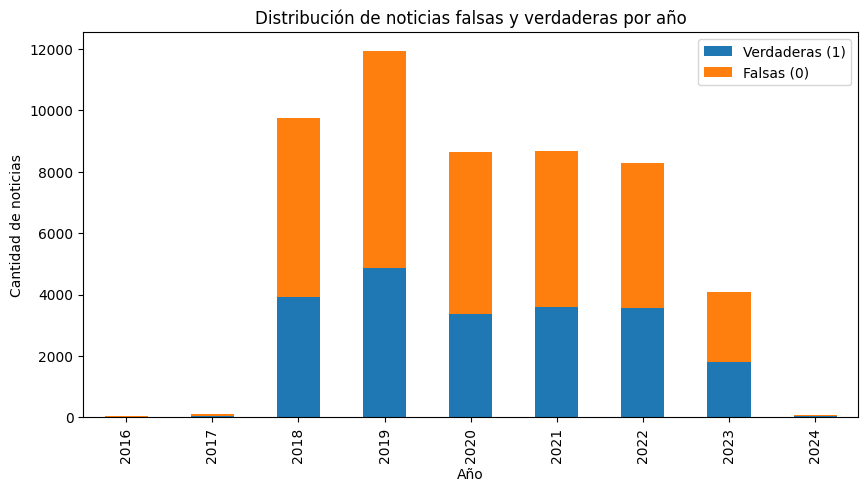

In [ ]:
plt.figure(figsize=(10,5))
df4.groupby([df4["Fecha"].dt.year, "Label"]).size().unstack().rename(columns={0: "Falsas", 1: "Verdaderas"}).plot(kind="bar", stacked=True, figsize=(10,5))
plt.title("Distribución de noticias falsas y verdaderas por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de noticias")
plt.legend(["Verdaderas (1)", "Falsas (0)"])
plt.show()

---
- Por último, verificamos el balance en la distribución de noticias según si son verdaderas o falsas.

Primero, usamos .describe() para obtener un resumen rápido de las estadísticas de las variables numéricas. Además, utilizamos un diagrama de torta para visualizar mejor los resultados.

In [ ]:
df4['Label'].describe()

,Label
count,51604.000000
mean,0.587571
std,0.492276
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
conteo_clases = df4["Label"].value_counts()

mapeo_etiquetas = {0: "Noticias Falsas", 1: "Noticias Verdaderas"}
fig = px.pie(names=conteo_clases.index.map(mapeo_etiquetas), values=conteo_clases.values,
             title=f'Distribución de noticias falsas y verdaderas ({df.shape[0]} noticias)')

fig

**Dado que la distribución entre noticias falsas y verdaderas es relativamente equilibrada, podemos trabajar con los datos sin necesidad de ajustar el balance de clases.**


# 3. Preparación y preprocesamiento de los datos

## 3.1 Lematización

- En este apartado vamos a implementar un código que procesa y limpia el texto de las columnas "Título" y "Descripción" para mejorar la detección de patrones. Primero, convierte el texto a minúsculas, tokeniza las palabras y elimina las stopwords en español. Luego, aplica lematización para reducir las palabras a su forma base, eliminando signos de puntuación y normalizando caracteres al remover tildes.

In [ ]:
def limpiar_texto(texto):
    texto = texto.lower()
    tokens = word_tokenize(texto, language='spanish')

    stop_words = set(stopwords.words('spanish'))
    palabras_filtradas = [palabra for palabra in tokens if palabra not in stop_words]

    texto_limpio = ' '.join(palabras_filtradas)
    return texto_limpio


df4['Titulo'] = df4["Titulo"].apply(limpiar_texto)
df4['Descripcion'] = df4["Descripcion"].apply(limpiar_texto)

display(df4.head(5))

,Label,Titulo,Descripcion,Fecha
0,1,'the guardian ' va sánchez : 'europa necesita ...,diario británico publicó pasado jueves editori...,2023-06-02
1,0,revelan gobierno negocio liberación mireles ca...,revelan gobierno negocio liberación mireles ca...,2023-10-01
2,1,'ahora nunca ' joan fuster estatuto valenciano...,valencianismo convoca castelló fiesta grande c...,2022-04-25
3,1,"iglesias alienta yolanda díaz , erc eh bildu n...","política , igual negociar empresarios , negoci...",2022-01-03
4,0,puigdemont : 'no ninguna tragedia repetición e...,"entrevista punt avui , líder jxcat desdramatiz...",2018-03-09


- Despúes de lo anterior, vamos a implementar la lematización de texto, con eso mejoramos la normalización del lenguaje en el análisis de datos. Utilizamos spaCy para procesar en lotes y extraer la forma base de cada palabra, luego eliminamos signos de puntuación y caracteres acentuados, ya que los requeriamos para un correcto funcionamiento de spaCy.

In [ ]:
def lematizar(texts):
    docs = nlp.pipe(texts, batch_size=500)
    textos_lematizados = [" ".join([token.lemma_ for token in doc if not token.is_punct])
                         for doc in docs]
    return [unicodedata.normalize('NFKD', texto).encode('ascii', 'ignore').decode('utf-8')
            for texto in textos_lematizados]

df5 = df4.copy()
df5['Titulo'] = lematizar(df5['Titulo'])
df5['Descripcion'] = lematizar(df5['Descripcion'])

display(df5.head(5))

,Label,Titulo,Descripcion,Fecha
0,1,the guardiar ir sanchez europa necesitar apues...,diario britanico publicar pasado jueves editor...,2023-06-02
1,0,revelar gobierno negocio liberacion mirel camb...,revelar gobierno negocio liberacion mirel camb...,2023-10-01
2,1,ahora nunca joan fuster estatuto valenciano cu...,valencianismo convocar castellar fiesta grande...,2022-04-25
3,1,iglesia alentar yolanda diaz erc eh bildu nego...,politico igual negociar empresario negociar gr...,2022-01-03
4,0,puigdemont no ninguno tragedia repeticion elec...,entrevista punt avui lider jxcat desdramatizad...,2018-03-09


## 3.2 Vectorización

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b[a-zA-ZáéíóúüñÁÉÍÓÚÜÑ]{2,}\b", max_features=5000)
X_tfidf = vectorizer.fit_transform(df5["Titulo"] + " " + df5["Descripcion"])

# Convertir a DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
print(tfidf_df.head())

   abajo  abalo  abalos  abandona  abandonado  abandonar  abandono  abascal  \
0    0.0    0.0     0.0       0.0         0.0        0.0       0.0      0.0   
1    0.0    0.0     0.0       0.0         0.0        0.0       0.0      0.0   
2    0.0    0.0     0.0       0.0         0.0        0.0       0.0      0.0   
3    0.0    0.0     0.0       0.0         0.0        0.0       0.0      0.0   
4    0.0    0.0     0.0       0.0         0.0        0.0       0.0      0.0   

   abc  abdicacion  abertzale  abiertamente  ...  zamoro  zapatero  zaplan  \
0  0.0         0.0        0.0           0.0  ...     0.0       0.0     0.0   
1  0.0         0.0        0.0           0.0  ...     0.0       0.0     0.0   
2  0.0         0.0        0.0           0.0  ...     0.0       0.0     0.0   
3  0.0         0.0        0.0           0.0  ...     0.0       0.0     0.0   
4  0.0         0.0        0.0           0.0  ...     0.0       0.0     0.0   

   zaplana  zaragoza  zaragozar  zarzalejos  zarzuela  z

## 4. Reportes Automáticos para realizar el entendimiento de los datos

Para los reportes automáticos, se puede usar al herramienta de pandas profiling.


Para cada columna, genera las siguientes estadísticas, si son relevantes para el tipo de columna, se presentan en un informe HTML interactivo:

1. Inferencia de tipo: detecta los tipos de columnas en un dataframe.
2. Esenciales: tipo, valores únicos, valores faltantes.
3. Estadísticas de cuantiles como valor mínimo, Q1, mediana, Q3, máximo, rango, rango intercuartílico. Esta opción es bastante útil para identificar datos atípicos.
4. Estadísticas descriptivas como media, moda, desviación estándar, suma, desviación absoluta mediana, coeficiente de variación, curtosis, asimetría.
5. Valores más frecuentes.
6. Histogramas.
7. Correlaciones destacando variables altamente correlacionadas, matrices de Spearman, Pearson y Kendall. Esto permite descubrir relaciones entre atributos.
8. Matriz de valores faltantes, recuento, mapa de calor y dendrograma de valores faltantes

Tomado de la librería oficial de pandas_profiling en [github](https://github.com/pandas-profiling/pandas-profiling)

Lo más importante al utilizar esta librería es recordar que lo fundamental son los análisis que hagamos sobre estos reportes.

In [ ]:
import pandas_profiling

profiling =pandas_profiling.ProfileReport(df5)
profiling

In [ ]:
profiling.to_file("Proyecto1_db_profile.html")

# 4. Modelamiento

## 4.1 Modelo basado en reglas (RIPPER)

Para clasificar noticias falsas utilizando un modelo basado en reglas, se escogio el algoritmo RIPPER (Repeated Incremental Pruning to Produce Error Reduction), ya que es una opción eficiente y escalable para conjuntos de datos grandes, como el de 60,000 registros.

Algunas de sus principales ventajas son:  

- **Simplicidad y explicabilidad**: Genera reglas fácilmente interpretables, lo que permite comprender mejor los patrones asociados a las noticias falsas.  
- **Eficiencia en grandes volúmenes de datos**: Está diseñado para procesar grandes cantidades de información sin riesgo de sobreajuste.  
- **Manejo de datos desbalanceados**: Puede ajustar la cobertura de las reglas para reducir el sesgo hacia la clase mayoritaria, mejorando así la precisión en la clasificación.

### Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

%pip install wittgenstein
import wittgenstein as lw

### Modelo

In [ ]:

pca = PCA(n_components=100, random_state=42)
X_reduced = pca.fit_transform(tfidf_df)

X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, df5['Label'], test_size=0.2, random_state=42)

X_train_sample = X_train
y_train_sample = y_train

print(y_train_sample.value_counts())
pos_class = 1 if y_train_sample.value_counts().idxmax() == 1 else 0

# Entrenar modelo RIPPER
ripper_classifier = lw.RIPPER()
ripper_classifier.fit(X_train_sample, y_train_sample, pos_class=pos_class)

# Hacer predicciones
y_pred = ripper_classifier.predict(X_test)

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Evaluar modelo
print(classification_report(y_test, y_pred))

## 4.2 Modelo Basado en Arboles de Decisión (XGBoost)

In [ ]:
%pip install xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_df, df5['Label'], test_size=0.2, random_state=42)

# Crear el modelo XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)


# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = xgb_model.predict(X_test)


# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])


# Evaluar el modelo
print(classification_report(y_test, y_pred))

## 4.3 Regresión logística - Andres Felipe Garcia

### 4.3.1 Descripción

Elegimos Regresión Logística para la clasificación de noticias porque es un modelo lineal eficiente y adecuado para tareas de clasificación binaria o multiclase, especialmente cuando el conjunto de datos es grande y tiene representaciones de texto vectorizadas como TF-IDF.

Este algoritmo estima la probabilidad de que una noticia pertenezca a una categoría específica aplicando la función sigmoide a una combinación lineal de características. Su principal ventaja es la interpretabilidad y su capacidad para manejar conjuntos de datos de alta dimensión sin requerir grandes recursos computacionales.

Además, en combinación con regularización L1 y L2, la regresión logística puede manejar problemas de sobreajuste al reducir la influencia de características irrelevantes. Su compatibilidad con técnicas de validación cruzada y búsqueda de hiperparámetros permite optimizar su rendimiento en la clasificación de noticias.

### 4.3.2 Modelo

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
X = tfidf_df
y = df5['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model_R = LogisticRegression()
model_R.fit(X_train, y_train)
predictions_R = model_R.predict(X_test)

# Evaluación del modelo
cr1 = classification_report(y_test, predictions_R)
print(cr1)


              precision    recall  f1-score   support

           0       0.94      0.81      0.87      4137
           1       0.88      0.97      0.92      6184

    accuracy                           0.90     10321
   macro avg       0.91      0.89      0.90     10321
weighted avg       0.91      0.90      0.90     10321



### 4.3.3 Validación cruzada

- En este apartado, se implementa un modelo de regresión logística utilizando búsqueda en malla (GridSearchCV) para optimizar sus hiperparámetros. Se define una cuadrícula con distintos valores de la penalización
𝐶
C y tipos de regularización (
𝐿
1
L1 y
𝐿
2
L2), permitiendo encontrar la mejor combinación mediante validación cruzada con cinco particiones. El modelo utiliza el solver "liblinear" para garantizar compatibilidad con ambas penalizaciones y se entrena con un máximo de 1000 iteraciones. Finalmente, se muestran los mejores hiperparámetros y la precisión obtenida.

In [ ]:
grid = {"C": np.logspace(-3, 3, 5), "penalty": ["l1", "l2"]}
model = LogisticRegression(solver="liblinear", max_iter=1000)
grid_search_lr = GridSearchCV(model, grid, scoring="accuracy", cv=5, verbose=1)
grid_search_lr.fit(X_train, y_train)

print("Mejores parámetros:", grid_search_lr.best_params_)
print("Mejor precisión:", grid_search_lr.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores parámetros: {'C': 1.0, 'penalty': 'l1'}
Mejor precisión: 0.9132814957100059


- En este apartado, se reentrena el modelo de regresión logística utilizando los mejores hiperparámetros encontrados en la búsqueda en malla. Luego, se evalúa su desempeño con el conjunto de prueba y se generan predicciones. Finalmente, se imprime el reporte de clasificación, que proporciona métricas clave como precisión, recall y F1-score para analizar el rendimiento del modelo.

In [ ]:
from sklearn.metrics import classification_report

best_params = grid_search_lr.best_params_
best_model = LogisticRegression(C=best_params["C"], penalty=best_params["penalty"], solver="liblinear", max_iter=1000)
best_model.fit(X_train, y_train)

predictions_best = best_model.predict(X_test)

print(classification_report(y_test, predictions_best))


              precision    recall  f1-score   support

           0       0.94      0.84      0.89      4137
           1       0.90      0.96      0.93      6184

    accuracy                           0.91     10321
   macro avg       0.92      0.90      0.91     10321
weighted avg       0.92      0.91      0.91     10321



### 4.3.4 Matriz de confusión

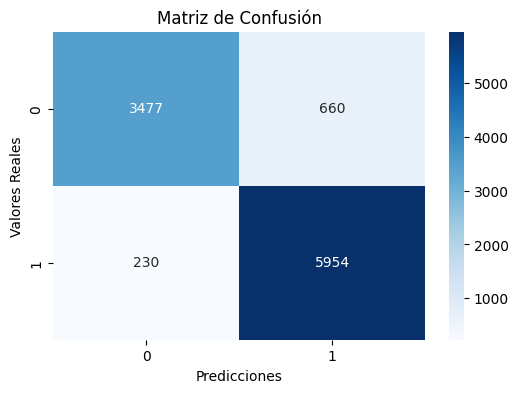

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions_best)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión")
plt.show()


# 5. Escoger un modelo con base en el desempeño y etiquetar

Después de realizar la validación cruzada, el modelo de Regresión Logística obtuvo un F1-score de 0.91, lo que indica un buen equilibrio entre precisión y exhaustividad en la clasificación de noticias.

Comparado con los modelos RIPPER (modelo basado en reglas) y XGBoost (árboles de decisión), la elección del modelo se basó en el desempeño medido con esta métrica. La regresión logística demostró ser eficiente, interpretable y con un rendimiento sobresaliente, por lo que fue seleccionada como el mejor modelo para la tarea.

In [ ]:
# Suponiendo que ya tienes el DataFrame df y las predicciones del modelo
df5["Label"] = best_model.predict(X_tfidf)

# Guardar el DataFrame con la nueva columna en un CSV
df.to_csv("df_etiquetado.csv", index=False, encoding="utf-8")

print("Archivo guardado como df_etiquetado.csv")